# Bundt Cake Plot Demonstration

The Bundt Cake Plot is described in [this paper](https://stanford.edu/~boyd/papers/bundt.html). In short, it is a method for analyzing and visualizing PV power data (and others) that emphasizes the daily and seasonal structure of the data. 

In [1]:
from solardatatools import DataHandler
from solardatatools.dataio import get_pvdaq_data

In [2]:
data_frame = get_pvdaq_data(sysid=34, year=range(2011, 2015), api_key="DEMO_KEY")

[============================================================] 100.0% ...queries complete in 4.2 seconds       



In [3]:
dh = DataHandler(data_frame)
dh.run_pipeline(power_col="ac_power")


            *********************************************
            * Solar Data Tools Data Onboarding Pipeline *
            *********************************************

            This pipeline runs a series of preprocessing, cleaning, and quality
            control tasks on stand-alone PV power or irradiance time series data.
            After the pipeline is run, the data may be plotted, filtered, or
            further analyzed.

            Authors: Bennet Meyers and Sara Miskovich, SLAC

            (Tip: if you have a mosek [https://www.mosek.com/] license and have it
            installed on your system, try setting solver='MOSEK' for a speedup)

            This material is based upon work supported by the U.S. Department
            of Energy's Office of Energy Efficiency and Renewable Energy (EERE)
            under the Solar Energy Technologies Office Award Number 38529.

            


task list: 100%|██████████████████████████████████| 7/7 [00:10<00:00,  1.44s/it]



total time: 10.08 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              2.19s
Cleaning                   0.11s
Filtering/Summarizing      7.78s
    Data quality           0.08s
    Clear day detect       0.15s
    Clipping detect        3.68s
    Capacity change detect 3.86s



In [4]:
dh.report()


-----------------
DATA SET REPORT
-----------------
length               4.00 years
capacity estimate    107.10 kW
data sampling        15 minutes
quality score        0.96
clearness score      0.55
inverter clipping    False
clipped fraction     0.00
capacity changes     False
data quality warning True
time shift errors    False
time zone errors     False
            


/Users/bmeyers/github/solar-data-tools/solardatatools/data_handler.py:2511: RuntimeWarning: All-NaN slice encountered
  data_for_bundt[day - 1] = np.nanmedian(day_data, axis=1)


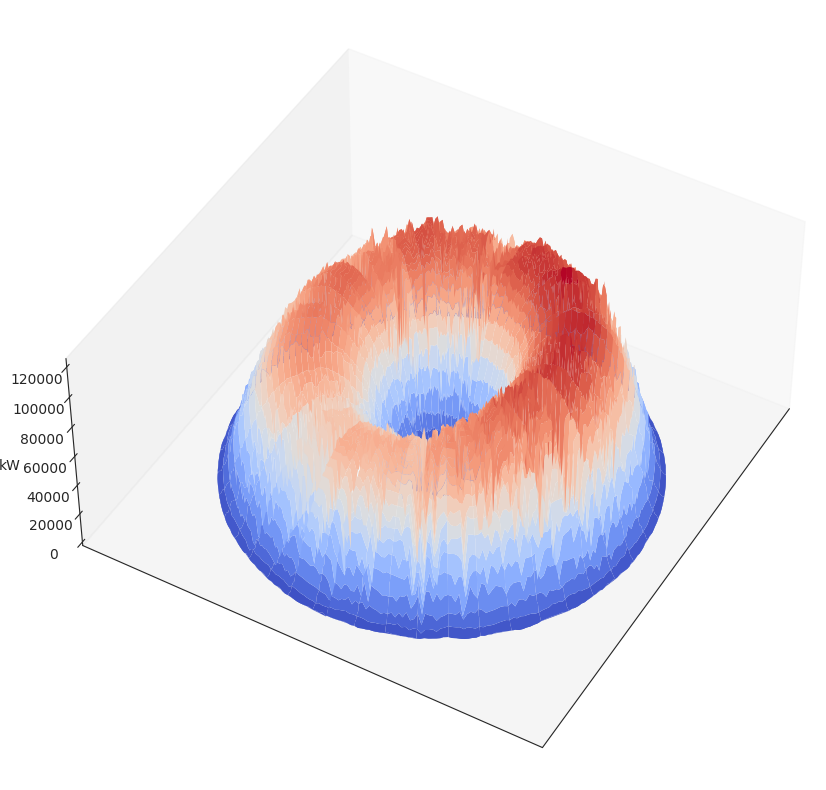

In [5]:
dh.plot_bundt(aggregate=True);

We can also make Bundt plots of the the estimated clear sky model. The model is designed to be multi-periodic on daily and yearly cycles, which is clearly visible in the Bundt plot.

In [6]:
dh.fit_statistical_clear_sky_model(nvals_dil=31, regularization=1)

100%|█████████████████████████████████████████████| 1/1 [01:06<00:00, 66.15s/it]


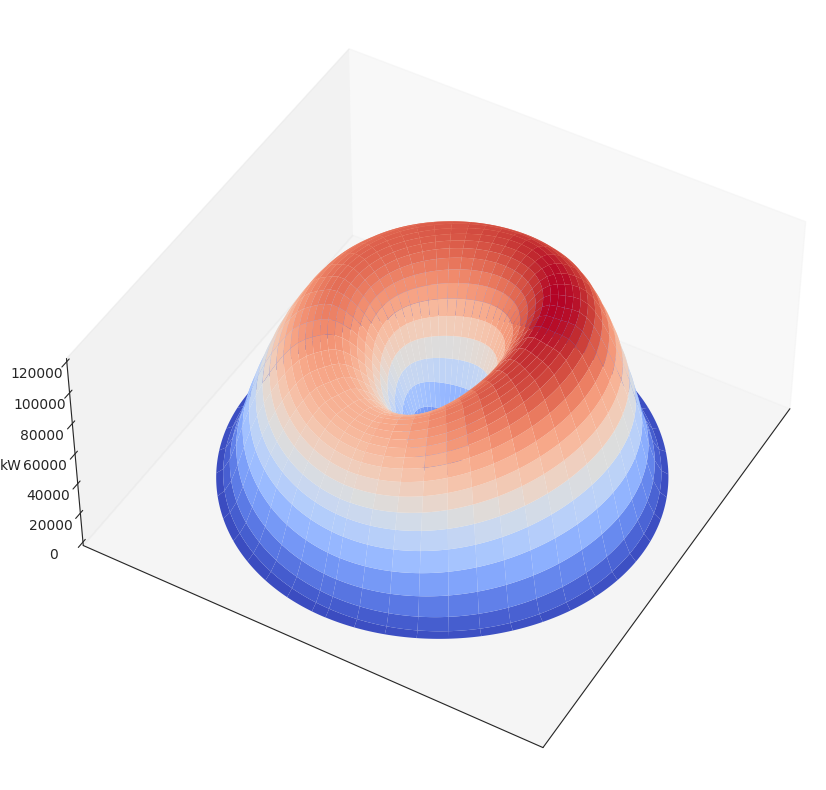

In [7]:
dh.quantile_object.plot_quantile_bundt(0.9);